# Apply to ML model
#XGBOOST

### Jupyter notebook about oil stocks performance in Brazilian market!

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
ativos = ['PETR4','PRIO3', 'RRRP3', 'RECV3', 'ENAT3', 'BRKM5']
# oil stocks

In [4]:
ativos = [i + '.SA' for i in ativos]

In [5]:
inicio = '2022-02-01'
#fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yest = yesterday.strftime('%Y-%m-%d')
#yest.type()
yest

'2023-09-05'

In [6]:
df = yf.download(ativos, start = inicio, end = yest)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [7]:
df.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2023-08-29,22.520000,15.420000,32.400002,45.849998,23.260000,31.860001
2023-08-30,22.580000,16.030001,32.619999,45.810001,23.200001,32.200001
2023-08-31,22.240000,15.690000,31.940001,46.419998,23.160000,32.919998
2023-09-01,22.309999,16.070000,32.630001,46.950001,23.559999,33.200001
2023-09-04,22.570000,15.860000,32.290001,46.610001,23.879999,32.849998


#### normalizando os ativos


In [8]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

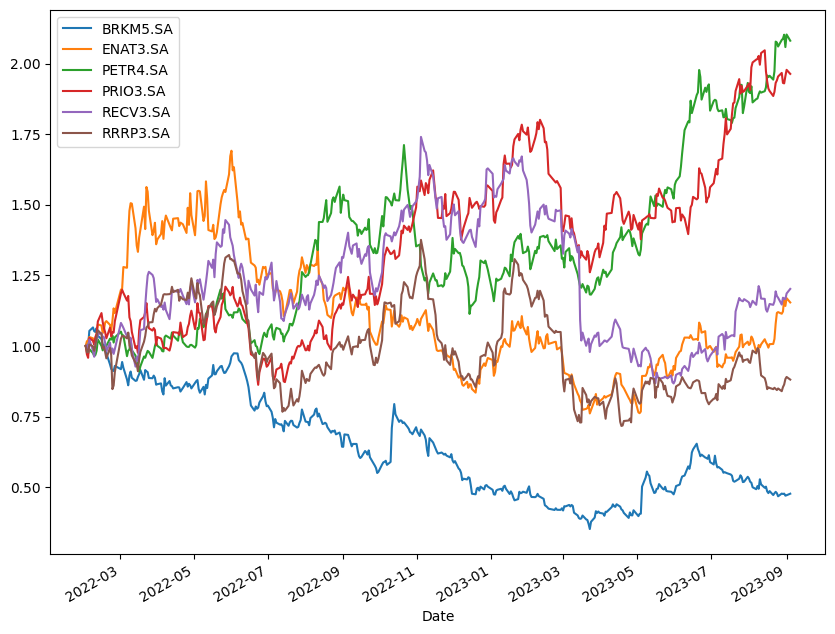

In [9]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [10]:
primeiro = df.iloc[0]

In [11]:
primeiro

BRKM5.SA    47.347416
ENAT3.SA    13.744496
PETR4.SA    15.517879
PRIO3.SA    23.740000
RECV3.SA    19.869770
RRRP3.SA    37.299999
Name: 2022-02-01 00:00:00, dtype: float64

In [12]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [13]:
comprados = 10000/primeiro

In [14]:
comprados

BRKM5.SA    211.204768
ENAT3.SA    727.563946
PETR4.SA    644.417984
PRIO3.SA    421.229996
RECV3.SA    503.277087
RRRP3.SA    268.096520
Name: 2022-02-01 00:00:00, dtype: float64

In [15]:
## Número de papéis arredondados
round(comprados, 0)

BRKM5.SA    211.0
ENAT3.SA    728.0
PETR4.SA    644.0
PRIO3.SA    421.0
RECV3.SA    503.0
RRRP3.SA    268.0
Name: 2022-02-01 00:00:00, dtype: float64

In [16]:
comprados = round(comprados, 0)

In [17]:
comprados

BRKM5.SA    211.0
ENAT3.SA    728.0
PETR4.SA    644.0
PRIO3.SA    421.0
RECV3.SA    503.0
RRRP3.SA    268.0
Name: 2022-02-01 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [18]:
PL = df*comprados
#PL=df*qntd

In [19]:
PL.head()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2022-02-01,9990.304760,10005.993340,9993.513775,9994.539904,9994.494335,9996.399796
2022-02-02,9928.060146,10170.026199,9848.154133,9695.630289,10013.633333,9768.600204
2022-02-03,9994.195652,10202.832771,9711.877396,9573.539904,9783.984545,9782.000000
2022-02-04,10521.331837,10320.935875,9881.464054,10276.609936,10219.359573,10044.639877
2022-02-07,10643.876423,10275.006813,9736.105640,10175.570032,9827.045132,9983.000000


In [20]:
PL.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2023-08-29,4751.720097,11225.760056,20865.600983,19302.849358,11699.780115,8538.480164
2023-08-30,4764.379984,11669.840500,21007.279312,19286.010578,11669.600384,8629.600204
2023-08-31,4692.639952,11422.319695,20569.360344,19542.819229,11649.479923,8822.559509
2023-09-01,4707.409887,11698.959778,21013.720688,19765.950321,11850.679731,8897.600204
2023-09-04,4762.269936,11546.079750,20794.760590,19622.810257,12011.639578,8803.799591


In [21]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [22]:
#PL.head()
PL.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,
2023-08-29,4751.720097,11225.760056,20865.600983,19302.849358,11699.780115,8538.480164,76384.190771
2023-08-30,4764.379984,11669.840500,21007.279312,19286.010578,11669.600384,8629.600204,77026.710962
2023-08-31,4692.639952,11422.319695,20569.360344,19542.819229,11649.479923,8822.559509,76699.178652
2023-09-01,4707.409887,11698.959778,21013.720688,19765.950321,11850.679731,8897.600204,77934.320610
2023-09-04,4762.269936,11546.079750,20794.760590,19622.810257,12011.639578,8803.799591,77541.359701


In [23]:
ibov = yf.download('^BVSP', start = inicio, end = yest)

[*********************100%***********************]  1 of 1 completed


In [24]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,112143.0,113302.0,112135.0,113147.0,113147.0,11133300
2022-02-02,113228.0,113666.0,111645.0,112161.0,112161.0,11751200
2022-02-03,111897.0,112502.0,111225.0,111696.0,111696.0,11039700
2022-02-04,111696.0,112415.0,110321.0,112245.0,112245.0,0
2022-02-07,112247.0,112517.0,111490.0,111996.0,111996.0,10672800


In [25]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [26]:
ibov = ibov[['Ibov']]

In [27]:
ibov

,Ibov
Date,
2022-02-01,113147.0
2022-02-02,112161.0
2022-02-03,111696.0
2022-02-04,112245.0
2022-02-07,111996.0
...,...
2023-08-29,118404.0
2023-08-30,117535.0
2023-08-31,115742.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [28]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [29]:
novo_df.head()

,Ibov,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,,
2022-02-01,113147.0,9990.304760,10005.993340,9993.513775,9994.539904,9994.494335,9996.399796,59975.245909
2022-02-02,112161.0,9928.060146,10170.026199,9848.154133,9695.630289,10013.633333,9768.600204,59424.104305
2022-02-03,111696.0,9994.195652,10202.832771,9711.877396,9573.539904,9783.984545,9782.000000,59048.430267
2022-02-04,112245.0,10521.331837,10320.935875,9881.464054,10276.609936,10219.359573,10044.639877,61264.341152
2022-02-07,111996.0,10643.876423,10275.006813,9736.105640,10175.570032,9827.045132,9983.000000,60640.604040


<Axes: xlabel='Date'>

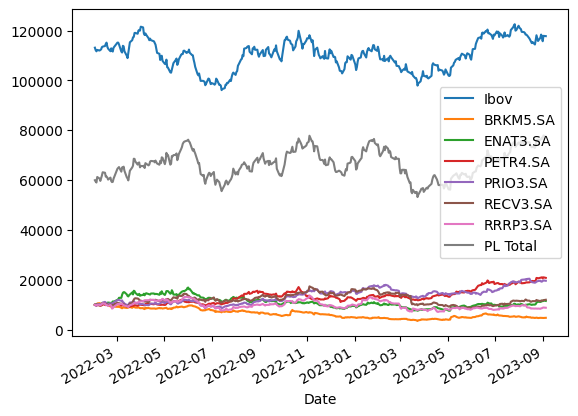

In [30]:
novo_df.plot()

In [31]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [32]:
novo_normalizado

,Ibov,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,,
2022-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-02-02,99.128567,99.376950,101.639346,98.545460,97.009271,100.191495,97.721184,99.081052
2022-02-03,98.717597,100.038947,101.967215,97.181808,95.787700,97.893742,97.855230,98.454670
2022-02-04,99.202807,105.315424,103.147539,98.878776,102.822241,102.249891,100.482575,102.149379
2022-02-07,98.982739,106.542059,102.688523,97.424248,101.811290,98.324586,99.865954,101.109388
...,...,...,...,...,...,...,...,...
2023-08-29,104.646168,47.563315,112.190361,208.791437,193.133947,117.062252,85.415553,127.359529
2023-08-30,103.878141,47.690036,116.628506,210.209140,192.965467,116.760288,86.327082,128.430838
2023-08-31,102.293477,46.971940,114.154780,205.827108,195.534956,116.558973,88.257370,127.884726


<Axes: xlabel='Date'>

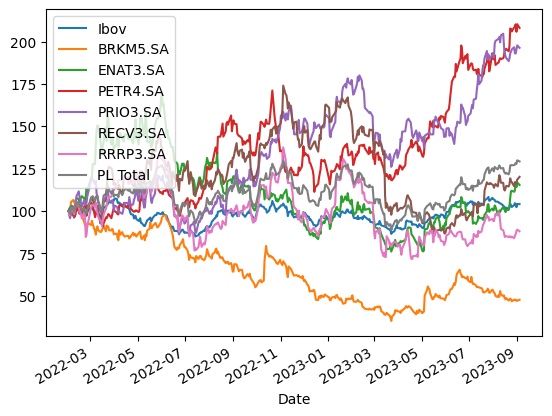

In [33]:
novo_normalizado.plot()

<Axes: >

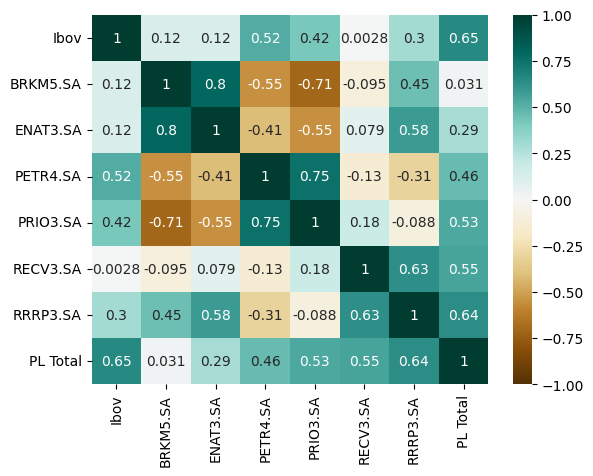

In [34]:
sns.heatmap(novo_normalizado.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: xlabel='Date'>

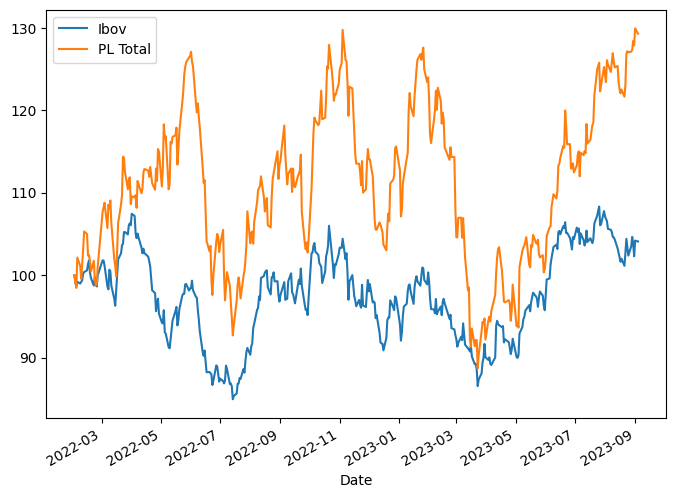

In [35]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (8,6))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [36]:
## oil stocks
ativos

['PETR4.SA', 'PRIO3.SA', 'RRRP3.SA', 'RECV3.SA', 'ENAT3.SA', 'BRKM5.SA']